# N-P-Z-D model in development

### NPZD (Nutrient-Phytoplankton-Zooplankton-Detritus) model of Sarmiento and Gruber (2006)

    - dN/dt = -Vmax*N/(N+K)*P - c*(N-Nth) + ld*D
    - dP/dt = Vmax*N/(N+K)*P -g*P*Z/Kp- lp*P
    - dZ/dt = a*g*P*Z/Kp - lz*Z
    - dD/dt = lp*P + Z*( (1-a)*g*P/Kp+lz ) - ld*D - Wsink/hml*D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
# coefficients
h = 1 # timestep size
t = np.arange(0,360,h) # time in day
N = np.size(t) # dimension of time step
nuto = .001 # initial condition for nutrient
phyo = .001 # initial condition for phyto
zooo = .001 # initial condition for zoo
deto = .001
# set parameters
Vmax = 1.4 # per day
K = 0.1 # mmol/m3
Kp= 2.8 # mmol/m3
a = 0.4
g = 1.4 # per day
lp = 0.05 # per day
lz = 0.12 # per day
ld = 0.05
c = 0.01 # per day
Nth = 10 # mmol/m3
Wsink = 20
hml = 50

In [3]:
def tendency(t,x,Vmax,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink):
    nut=x[0]
    phy=x[1]
    zoo=x[2]
    det=x[3]
    dnutdt = -Vmax*nut/(nut+K)*phy -c*(nut-Nth) + ld*det
    dphydt = Vmax*nut/(nut+K)*phy - zoo*g*phy/Kp - lp*phy
    dzoodt = a*zoo*g*phy/Kp -lz*zoo
    ddetdt = lp*phy+lz*zoo+(1-a)*g*phy*zoo/Kp -ld*det-Wsink/hml*det
    out=np.array([dnutdt,dphydt,dzoodt,ddetdt])
    return out

In [4]:
# define model_run function
def model_run(trange,xinit,param,dt):
    # expand input
    Vmax = param[0]
    K = param[1]
    Kp= param[2]
    a = param[3]
    g = param[4]
    lp= param[5]
    lz= param[6]
    ld= param[7]
    c = param[8]
    Nth= param[9]
    hml= param[10]
    Wsink=param[11]
    sol = solve_ivp(tendency,trange,xinit,args=(Vmax,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink),method='RK45',max_step=dt)
    return sol

In [5]:
# set time range
trange = [0,500]
# set parameters
param=np.array([Vmax,K,Kp,a,g,lp,lz,ld,c,Nth,hml,Wsink])
# set initial conditions
xinit = np.array([nuto,phyo,zooo,deto])
# time step size
h = 1
out = model_run(trange,xinit,param,h)

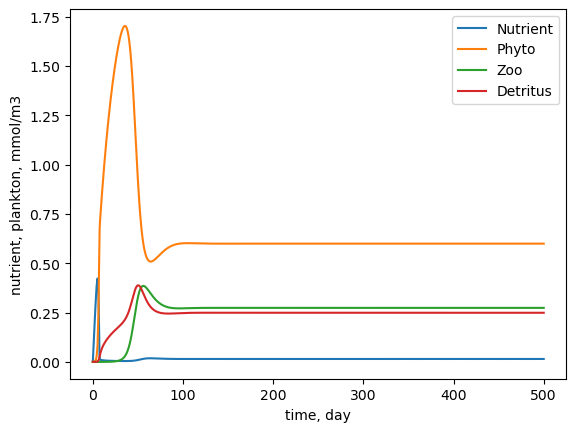

In [6]:
# plot the output
t_out = out.t
vec_out = out.y
N_out = vec_out[0,:]
P_out = vec_out[1,:]
Z_out = vec_out[2,:]
D_out = vec_out[3,:]
#
plt.plot(t_out,N_out,label='Nutrient')
plt.plot(t_out,P_out,label='Phyto')
plt.plot(t_out,Z_out,label='Zoo')
plt.plot(t_out,D_out,label='Detritus')
plt.legend()
plt.xlabel('time, day')
plt.ylabel('nutrient, plankton, mmol/m3')
plt.show()